![Finance Toolkit](https://github.com/JerBouma/FinanceToolkit/assets/46355364/198d47bd-e1b3-492d-acc4-5d9f02d1d009)

**The FinanceToolkit** is an open-source toolkit in which all relevant financial ratios (100+), indicators and performance measurements are written down in the most simplistic way allowing for complete transparency of the calculation method. This allows you to not have to rely on metrics from other providers and, given a financial statement, allow for efficient manual calculations. This leads to one uniform method of calculation being applied that is available and understood by everyone.

## Table of Contents

1. [Installation](#installation)
2. [The Toolkit Module](#the-toolkit-module)
3. [The Ratios Module](#the-ratios-module)
4. [The Models Module](#the-models-module)
5. [The Technicals Module](#the-technicals-module)

# Installation
To install the FinanceToolkit it simply requires the following:

```
pip install financetoolkit -U
```

From within Python use:

```python
from financetoolkit import Toolkit
```
 
To be able to get started, you need to obtain an API Key from FinancialModelingPrep. This is used to gain access to 30+ years of financial statement both annually and quarterly. Note that the Free plan is limited to 250 requests each day, 5 years of data and only features companies listed on US exchanges.

___ 

<b><div align="center">Obtain an API Key from FinancialModelingPrep <a href="https://site.financialmodelingprep.com/developer/docs/pricing/jeroen/">here</a>.</div></b>
___

Through the link you are able to subscribe for the free plan and also premium plans at a **15% discount**. This is an affiliate link and thus supports the project at the same time. I have chosen FinancialModelingPrep as a source as I find it to be the most transparent, reliable and at an affordable price. When you notice that data is inaccurate or have any other issue related to the data, note that I simply provide the means to access this data and I am not responsible for the accuracy of the data itself. For this, use [their contact form](https://site.financialmodelingprep.com/contact) or provide the data yourself. 

In [1]:
import pandas as pd
import numpy as np

from financetoolkit import Toolkit

API_KEY = "FINANCIAL_MODELING_PREP_KEY"

# The Toolkit Module

Initializing only is required once. This is the case for any function so once you have obtained a balance sheet statement, it will be stored accordingly which means that requests to FinancialModelingPrep, the source used in these examples, are kept to a minimum. Note that in this example annual data is used but by adding `quarterly=True` to the Toolkit initialization, quarterly data can also be collected. Note that this requires a Premium subscription from FMP. Please view the documentation [here](https://www.jeroenbouma.com/projects/financetoolkit/docs#Toolkit-Module) to find all the available functionality.

In [2]:
# Initialize the Toolkit with company tickers
companies = Toolkit(
    ["AAPL", "MSFT", "GOOGL", "AMZN"], api_key=API_KEY, start_date="2005-01-01"
)

Let's start off by collecting some historical data. Here, there are multiple periods that can be selected. This can be 'daily', 'weekly', 'monthly', 'quarterly', or 'yearly'. The default is 'daily'.

Obtaining historical data: 100%|██████████| 4/4 [00:01<00:00,  2.44it/s]


Open                                        High             \
                 AAPL       MSFT      GOOGL       AMZN       AAPL       MSFT   
Date                                                                           
2005-01-03   1.156786  26.799999    4.93994     2.2475   1.162679  26.950001   
2005-01-04   1.139107  26.870001    5.04004     2.1335   1.169107       27.1   
2005-01-05   1.151071      26.84   4.841091     2.0785   1.165179       27.1   
2005-01-06   1.154821      26.85   4.881882     2.0905   1.159107  27.059999   
2005-01-07   1.160714      26.82   4.770771      2.069   1.243393  26.889999   
...               ...        ...        ...        ...        ...        ...   
2023-08-28 180.089996 325.660004 131.309998 133.779999 180.589996 326.149994   
2023-08-29 179.699997 321.880005 132.240005 133.380005 184.899994 328.980011   
2023-08-30 184.940002 328.670013 134.779999 134.929993 187.850006 329.809998   
2023-08-31 187.839996 329.200012 136.009995 135.059998 189.119995 330.910004   
2023-09-01 189.490005 331.309998 137.460007 139.460007 189.919998  331.98999   

                                        Low             ...  \
                GOOGL       AMZN       AAPL       MSFT  ...   
Date                                                    ...   
2005-01-03   5.096096      2.272   1.117857      26.65  ...   
2005-01-04   5.078328      2.163   1.124464      26.66  ...   
2005-01-05   4.927427      2.138    1.14375      26.76  ...   
2005-01-06   4.902402     2.1125   1.130893  26.639999  ...   
2005-01-07   4.861111     2.1345    1.15625  26.620001  ...   
...               ...        ...        ...        ...  ...   
2023-08-28 132.539993 133.949997 178.550003 321.720001  ...   
2023-08-29 136.570007 135.139999      179.5 321.880005  ...   
2023-08-30 136.279999 135.679993 184.740005 326.450012  ...   
2023-08-31      138.0 138.789993 187.479996 326.779999  ...   
2023-09-01 137.460007 139.960007 188.279999 326.779999  ...   

                   Excess Return                        Excess Volatility  \
                           GOOGL                  AMZN               AAPL   
Date                                                                        
2005-01-03  0.009254894990750287 -0.037006954165726066 0.0232800728326567   
2005-01-04  -0.08330131455404616  -0.09625911949685523 0.0232800728326567   
2005-01-05    -0.047889815499838  -0.05158025628856216 0.0232800728326567   
2005-01-06  -0.06833192900993339   -0.0599372516159921 0.0232800728326567   
2005-01-07 -0.014690664512295108 -0.011862119366626227 0.0232800728326567   
...                          ...                   ...                ...   
2023-08-28  -0.03339973855482989  -0.04300046528967691 0.0232800728326567   
2023-08-29 -0.014026409160614026 -0.027905685644477138 0.0232800728326567   
2023-08-30  -0.03146530480896824   -0.0400140019623748 0.0232800728326567   
2023-08-31 -0.038765815503907515 -0.019133598521987212 0.0232800728326567   
2023-09-01 -0.045445274344499895 -0.040902956278637756 0.0232800728326567   

                                                                         \
                          MSFT                GOOGL                AMZN   
Date                                                                      
2005-01-03 0.02070372754577942 0.021986447149855946 0.02668570374665928   
2005-01-04 0.02070372754577942 0.021986447149855946 0.02668570374665928   
2005-01-05 0.02070372754577942 0.021986447149855946 0.02668570374665928   
2005-01-06 0.02070372754577942 0.021986447149855946 0.02668570374665928   
2005-01-07 0.02070372754577942 0.021986447149855946 0.02668570374665928   
...                        ...                  ...                 ...   
2023-08-28 0.02070372754577942 0.021986447149855946 0.02668570374665928   
2023-08-29 0.02070372754577942 0.021986447149855946 0.02668570374665928   
2023-08-30 0.02070372754577942 0.021986447149855946 0.02668570374665928   
2023-08-31 0.02070372754577942 0.0

Open                                        High             \
           AAPL       MSFT      GOOGL       AMZN       AAPL       MSFT   
Date                                                                     
2005     2.5325      26.15  10.442192     2.3865   2.586786  26.309999   
2006   2.998214  29.860001  11.564064      2.003       3.05      30.15   
2007      7.125  35.900002  17.481731     4.6905   7.160714  35.990002   
2008   3.070357  19.309999   7.612613      2.537   3.133571      19.68   
2009   7.611786      30.98  15.634384     6.8545   7.619643      30.99   
2010  11.533929  27.799999  14.933433      9.098  11.552857      27.92   
2011  14.411071       26.0  16.066566      8.668      14.51  26.120001   
2012  18.233213      26.59  17.517517    12.1875  19.121429      26.77   
2013  19.791786  37.400002  27.833834     19.729  20.045713  37.580002   
2014     28.205      46.73  26.886999    15.5775  28.282499  47.439999   
2015  26.752501  56.040001  39.390999  34.304001    26.7575  56.189999   
2016    29.1625  62.959999    40.1605  38.323502  29.299999  62.990002   
2017  42.630001  85.629997  52.774502    59.1175  42.647499  86.050003   
2018    39.6325 101.290001  52.891499  75.540001      39.84 102.400002   
2019  72.482498 156.770004  66.789497  92.099998  73.419998 157.770004   
2020 134.080002 221.699997  86.863503     163.75 134.740005      223.0   
2021 178.089996  338.51001 146.050003 168.955994 179.229996 339.359985   
2022 128.410004 238.210007  86.980003  83.120003 129.949997 239.960007   
2023 189.490005 331.309998 137.460007 139.460007 189.919998  331.98999   

                                  Low             ...         Excess Return  \
          GOOGL       AMZN       AAPL       MSFT  ...                 GOOGL   
Date                                              ...                         
2005  10.465716       2.41   2.512143       26.1  ...    1.1079749319888277   
2006  11.623373     2.0125   2.977143      29.83  ...   0.06286484067146994   
2007   17.57983     4.7185     7.0625      35.52  ...    0.4612503632048668   
2008   7.782783     2.5845   3.047857      19.27  ...   -0.5774847349884744   
2009  15.650651      6.864       7.52      30.48  ...    0.9768120763496422   
2010  14.975475      9.115  11.475357  27.629999  ...  -0.07505297265262065   
2011  16.185184     8.7585  14.410357      25.91  ...   0.06872868898879542   
2012  17.782032    12.6205  18.178572  26.370001  ...   0.07758497786145507   
2013  28.053053    19.9415  19.785713  37.220001  ...    0.5540110930493278   
2014      26.92     15.649    27.5525  46.450001  ...  -0.07564013612379322   
2015    39.4165  34.387501     26.205  55.419998  ...    0.4434176472273152   
2016  40.164501  38.369999    28.8575  62.029999  ... -0.005939827728696868   
2017    52.9025  59.200001     42.305       85.5  ...    0.3052951396480499   
2018  53.149502  76.038002  39.119999 100.440002  ...  -0.03491209447549245   
2019  67.032997  92.663002  72.379997 156.449997  ...    0.2625619185086142   
2020     87.875 164.145996 131.720001 219.679993  ...    0.2993360741393044   
2021 146.698502 169.350006 177.259995 335.850006  ...    0.6378578052328919   
2022  88.300003  84.050003     127.43 236.660004  ...  -0.42969553506698094   
2023 137.460007 139.960007 188.279999 326.779999  ...    0.4958722473907203   

                            Excess Volatility                      \
                     AMZN                AAPL                MSFT   
Date                                                                
2005  0.02067439602619086  0.3897048791545021  0.1447371226087196   
2006 -0.21019650053022262  0.3865957613673338 0.21299688749781526   
2007   1.3072938672072985 0.38090773482917584 0.23542701168391977   
2008 -0.46885941278065624  0.5832862592700809 0.48846803069963995   
2009   1.5848449297971918 0.34401822511605623 0.37321441658160837   
2010   0.3049909901873328  0.2759458206439108  0.2314256145668312   
2011 -0.05703333333333

<Axes: title={'center': 'Cumulative Returns of Apple, Microsoft, Google and Amazon'}, xlabel='Date'>

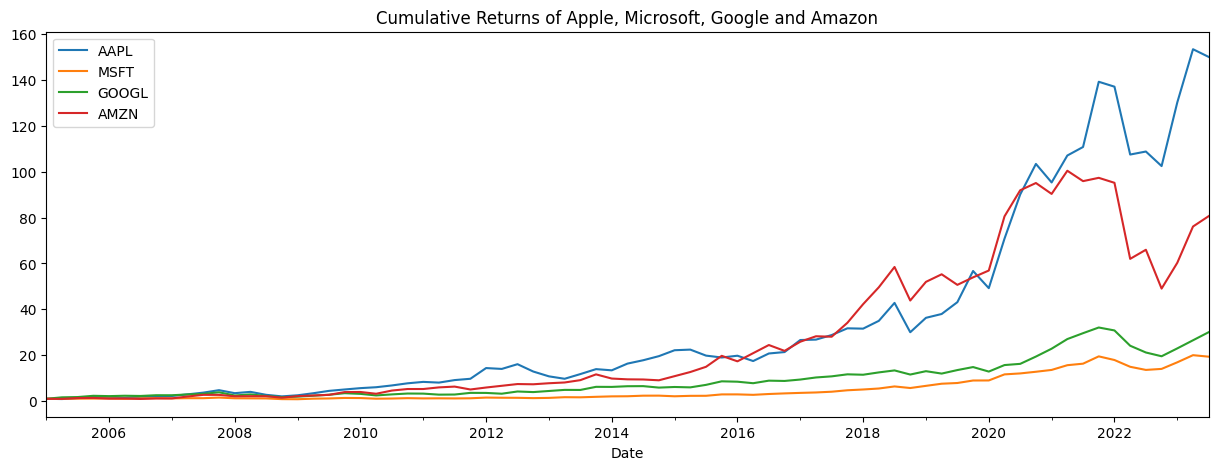

In [3]:
# Obtain daily historical data from each company
display(companies.get_historical_data())
        
# Obtain yearly historical data from each company
display(companies.get_historical_data(period="yearly"))

# Plot the Cumulative Returns
companies.get_historical_data(period='quarterly')["Cumulative Return"].plot(figsize=(15, 5), title="Cumulative Returns of Apple, Microsoft, Google and Amazon")

In [4]:
# Obtain the balance sheets from each company
companies.get_balance_sheet_statement()

Obtaining balance data: 100%|██████████| 4/4 [00:01<00:00,  2.04it/s]


date                                          2005          2006  \
AAPL Cash and Cash Equivalents        3491000000.0  6392000000.0   
     Short Term Investments           4770000000.0  3718000000.0   
     Cash and Short Term Investments  8261000000.0 10110000000.0   
     Accounts Receivable              1312000000.0  2845000000.0   
     Inventory                         165000000.0   270000000.0   
...                                            ...           ...   
MSFT Minority Interest                         0.0           0.0   
     Total Liabilities and Equity    70815000000.0 69597000000.0   
     Total Investments               32900000000.0 27447000000.0   
     Total Debt                                0.0           0.0   
     Net Debt                        -4851000000.0 -6714000000.0   

date                                          2007           2008  \
AAPL Cash and Cash Equivalents        9352000000.0  11875000000.0   
     Short Term Investments           6034000000.0  12615000000.0   
     Cash and Short Term Investments 15386000000.0  24490000000.0   
     Accounts Receivable              4029000000.0   2422000000.0   
     Inventory                         346000000.0    509000000.0   
...                                            ...            ...   
MSFT Minority Interest                         0.0            0.0   
     Total Liabilities and Equity    63171000000.0  72793000000.0   
     Total Investments               17300000000.0  19911000000.0   
     Total Debt                                0.0            0.0   
     Net Debt                        -6111000000.0 -10339000000.0   

date                                          2009          2010  \
AAPL Cash and Cash Equivalents        5263000000.0 11261000000.0   
     Short Term Investments          18201000000.0 14359000000.0   
     Cash and Short Term Investments 23464000000.0 25620000000.0   
     Accounts Receivable              3361000000.0  9924000000.0   
     Inventory                         455000000.0  1051000000.0   
...                                            ...           ...   
MSFT Minority Interest                         0.0           0.0   
     Total Liabilities and Equity    77888000000.0 86113000000.0   
     Total Investments               30304000000.0 39037000000.0   
     Total Debt                       5746000000.0  5939000000.0   
     Net Debt                         -330000000.0   434000000.0   

date                                           2011           2012  \
AAPL Cash and Cash Equivalents         9815000000.0  10746000000.0   
     Short Term Investments           16137000000.0  18383000000.0   
     Cash and Short Term Investments  25952000000.0  29129000000.0   
     Accounts Receivable              11717000000.0  18692000000.0   
     Inventory                          776000000.0    791000000.0   
...                                             ...            ...   
MSFT Minority Interest                          0.0            0.0   
     Total Liabilities and Equity    108704000000.0 121271000000.0   
     Total Investments                54027000000.0  65878000000.0   
     Total Debt                       11921000000.0  11944000000.0   
     Net Debt                          2311000000.0   5006000000.0   

date                                           2013           2014  \
AAPL Cash and Cash Equivalents        14259000000.0  13844000000.0   
     Short Term Investments           26287000000.0  11233000000.0   
     Cash and Short Term Investments  40546000000.0  25077000000.0   
     Accounts Receivable              20641000000.0  27219000000.0   
     Inventory                         1764000000.0   2111000000.0   
...                                             ...            ...   
MSFT Minority Interest                          0.0            0.0   
     Total Liabilities and Equity    142431000000.0 172384000000.0   
     Total Investments                84062000000.0  91637000000.0

In [5]:
# Obtain the income statements from each company
companies.get_income_statement()

Obtaining income data: 100%|██████████| 4/4 [00:01<00:00,  2.01it/s]


date                                            2005          2006  \
AAPL Revenue                           13931000000.0 19315000000.0   
     Cost of Goods Sold                 9888000000.0 13717000000.0   
     Gross Profit                       4043000000.0  5598000000.0   
     Gross Profit Ratio                       0.2902        0.2898   
     Research and Development Expenses   534000000.0   712000000.0   
...                                              ...           ...   
MSFT Net Income Ratio                          0.308        0.2845   
     EPS                                        1.13          1.21   
     EPS Diluted                                1.12           1.2   
     Weighted Average Shares           10839000000.0 10438000000.0   
     Weighted Average Shares Diluted   10906000000.0 10531000000.0   

date                                            2007          2008  \
AAPL Revenue                           24006000000.0 32479000000.0   
     Cost of Goods Sold                15852000000.0 21334000000.0   
     Gross Profit                       8154000000.0 11145000000.0   
     Gross Profit Ratio                       0.3397        0.3431   
     Research and Development Expenses   782000000.0  1109000000.0   
...                                              ...           ...   
MSFT Net Income Ratio                         0.2751        0.2926   
     EPS                                        1.44           1.9   
     EPS Diluted                                1.42          1.87   
     Weighted Average Shares            9742000000.0  9328000000.0   
     Weighted Average Shares Diluted    9886000000.0  9470000000.0   

date                                            2009          2010  \
AAPL Revenue                           36537000000.0 65225000000.0   
     Cost of Goods Sold                23397000000.0 39541000000.0   
     Gross Profit                      13140000000.0 25684000000.0   
     Gross Profit Ratio                       0.3596        0.3938   
     Research and Development Expenses  1333000000.0  1782000000.0   
...                                              ...           ...   
MSFT Net Income Ratio                         0.2493        0.3002   
     EPS                                        1.63          2.13   
     EPS Diluted                                1.62           2.1   
     Weighted Average Shares            8945000000.0  8813000000.0   
     Weighted Average Shares Diluted    8996000000.0  8927000000.0   

date                                             2011           2012  \
AAPL Revenue                           108249000000.0 156508000000.0   
     Cost of Goods Sold                 64431000000.0  87846000000.0   
     Gross Profit                       43818000000.0  68662000000.0   
     Gross Profit Ratio                        0.4048         0.4387   
     Research and Development Expenses   2429000000.0   3381000000.0   
...                                               ...            ...   
MSFT Net Income Ratio                           0.331         0.2303   
     EPS                                         2.73           2.02   
     EPS Diluted                                 2.69            2.0   
     Weighted Average Shares             8490000000.0   8396000000.0   
     Weighted Average Shares Diluted     8593000000.0   8506000000.0   

date                                             2013           2014  \
AAPL Revenue                           170910000000.0 182795000000.0   
     Cost of Goods Sold                106606000000.0 112258000000.0   
     Gross Profit                       64304000000.0  70537000000.0   
     Gross Profit Ratio                        0.3762         0.3859   
     Research and Development Expenses   4475000000.0   6041000000.0   
...                                               ...            ...   
MSFT Net Income Ratio                          0.2808         0.2542   
     EPS                            

In [6]:
# Obtain the cash flow statements from each company
companies.get_cash_flow_statement()

Obtaining cashflow data: 100%|██████████| 4/4 [00:01<00:00,  2.06it/s]


date                                        2005          2006          2007  \
AAPL Net Income                     1335000000.0  1989000000.0  3496000000.0   
     Depreciation and Amortization   179000000.0   225000000.0   317000000.0   
     Deferred Income Tax             505000000.0    53000000.0    78000000.0   
     Stock Based Compensation         42000000.0   163000000.0   242000000.0   
     Change in Working Capital       465000000.0  -221000000.0  1325000000.0   
...                                          ...           ...           ...   
MSFT Cash End of Period             4851000000.0  6714000000.0  6111000000.0   
     Cash Beginning of Period      14304000000.0  4851000000.0  6714000000.0   
     Operating Cash Flow           16605000000.0 14404000000.0 17796000000.0   
     Capital Expenditure            -812000000.0 -1578000000.0 -2264000000.0   
     Free Cash Flow                15793000000.0 12826000000.0 15532000000.0   

date                                        2008          2009          2010  \
AAPL Net Income                     4834000000.0  5704000000.0 14013000000.0   
     Depreciation and Amortization   473000000.0   703000000.0  1027000000.0   
     Deferred Income Tax            -368000000.0  -519000000.0  1440000000.0   
     Stock Based Compensation        516000000.0   710000000.0   879000000.0   
     Change in Working Capital      4119000000.0  3535000000.0  1212000000.0   
...                                          ...           ...           ...   
MSFT Cash End of Period            10339000000.0  6076000000.0  5505000000.0   
     Cash Beginning of Period       6111000000.0 10339000000.0  6076000000.0   
     Operating Cash Flow           21612000000.0 19037000000.0 24073000000.0   
     Capital Expenditure           -3182000000.0 -3119000000.0 -1977000000.0   
     Free Cash Flow                18430000000.0 15918000000.0 22096000000.0   

date                                        2011          2012          2013  \
AAPL Net Income                    25922000000.0 41733000000.0 37037000000.0   
     Depreciation and Amortization  1814000000.0  3277000000.0  6757000000.0   
     Deferred Income Tax            2868000000.0  4405000000.0  1141000000.0   
     Stock Based Compensation       1168000000.0  1740000000.0  2253000000.0   
     Change in Working Capital      5757000000.0  -299000000.0  6478000000.0   
...                                          ...           ...           ...   
MSFT Cash End of Period             9610000000.0  6938000000.0  3804000000.0   
     Cash Beginning of Period       5505000000.0  9610000000.0  6938000000.0   
     Operating Cash Flow           26994000000.0 31626000000.0 28833000000.0   
     Capital Expenditure           -2355000000.0 -2305000000.0 -4257000000.0   
     Free Cash Flow                24639000000.0 29321000000.0 24576000000.0   

date                                        2014          2015          2016  \
AAPL Net Income                    39510000000.0 53394000000.0 45687000000.0   
     Depreciation and Amortization  7946000000.0 11257000000.0 10505000000.0   
     Deferred Income Tax            2347000000.0  1382000000.0  4938000000.0   
     Stock Based Compensation       2863000000.0  3586000000.0  4210000000.0   
     Change in Working Capital      7047000000.0 11647000000.0   484000000.0   
...                                          ...           ...           ...   
MSFT Cash End of Period             8669000000.0  5595000000.0  6510000000.0   
     Cash Beginning of Period       3804000000.0  8669000000.0  5595000000.0   
     Operating Cash Flow           32231000000.0 29080000000.0 33325000000.0   
     Capital Expenditure           -5485000000.0 -5944000000.0 -8343000000.0   
     Free Cash Flow                26746000000.0 23136000000.0 24982000000.0   

date                                        2017           2018  \
AAPL Net Income                    48351000000.0  59531000000.0   
     Depreciation and 

With this structure, it is easy to select and plot specific companies, financial statement items and/or years. See some examples below.

date,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Cash and Cash Equivalents,1013000000.0,1022000000.0,2539000000.0,2769000000.0,3444000000.0,3777000000.0,5269000000.0,8084000000.0,8658000000.0,14557000000.0,15890000000.0,19334000000.0,20522000000.0,31750000000.0,36092000000.0,42122000000.0,36220000000.0,53888000000.0,NaN
Short Term Investments,987000000.0,997000000.0,573000000.0,958000000.0,2922000000.0,4985000000.0,4307000000.0,3364000000.0,3789000000.0,2859000000.0,3918000000.0,6647000000.0,10464000000.0,9500000000.0,18929000000.0,42274000000.0,59829000000.0,16138000000.0,NaN
Cash and Short Term Investments,2000000000.0,2019000000.0,3112000000.0,3727000000.0,6366000000.0,8762000000.0,9576000000.0,11448000000.0,12447000000.0,17416000000.0,19808000000.0,25981000000.0,30986000000.0,41250000000.0,55021000000.0,84396000000.0,96049000000.0,70026000000.0,NaN
Accounts Receivable,274000000.0,399000000.0,705000000.0,827000000.0,988000000.0,1587000000.0,2571000000.0,3364000000.0,4767000000.0,5612000000.0,6423000000.0,8339000000.0,13164000000.0,16677000000.0,20816000000.0,24542000000.0,32891000000.0,42360000000.0,NaN
Inventory,566000000.0,877000000.0,1200000000.0,1399000000.0,2171000000.0,3202000000.0,4992000000.0,6031000000.0,7411000000.0,8299000000.0,10243000000.0,11461000000.0,16047000000.0,17174000000.0,20497000000.0,23795000000.0,32640000000.0,34405000000.0,NaN


date,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
AAPL,1312000000.0,2845000000.0,4029000000.0,2422000000.0,3361000000.0,9924000000.0,11717000000.0,18692000000.0,20641000000.0,27219000000.0,30343000000.0,29299000000.0,35673000000.0,48995000000.0,45804000000.0,37445000000.0,51506000000.0,60932000000.0,NaN
AMZN,274000000.0,399000000.0,705000000.0,827000000.0,988000000.0,1587000000.0,2571000000.0,3364000000.0,4767000000.0,5612000000.0,6423000000.0,8339000000.0,13164000000.0,16677000000.0,20816000000.0,24542000000.0,32891000000.0,42360000000.0,NaN
GOOGL,687976000.0,1322340000.0,2307774000.0,2642192000.0,3201715000.0,5002000000.0,6172000000.0,8585000000.0,9390000000.0,11556000000.0,13909000000.0,14232000000.0,18705000000.0,21193000000.0,27492000000.0,31384000000.0,40270000000.0,40258000000.0,NaN
MSFT,7180000000.0,9316000000.0,11338000000.0,13589000000.0,11192000000.0,13014000000.0,14987000000.0,15780000000.0,17486000000.0,19544000000.0,17908000000.0,18277000000.0,19792000000.0,26481000000.0,29524000000.0,32011000000.0,38043000000.0,44261000000.0,48688000000.0


<Axes: title={'center': 'Total Shareholder Equity in 2022'}>

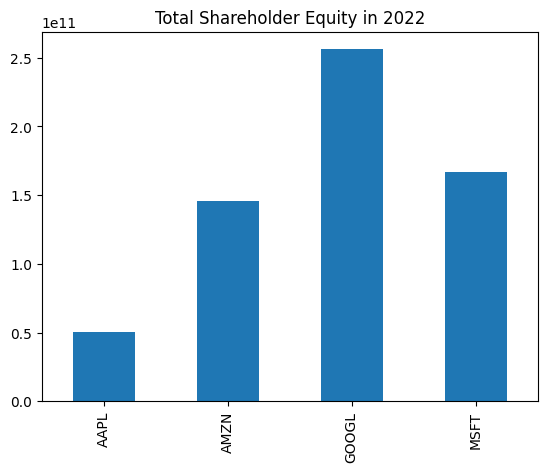

In [7]:
# Save to a variable for easier access
balance_sheet = companies.get_balance_sheet_statement()

# Show only the balance sheet statement for Amazon (purposely cut off to keep it compact)
display(balance_sheet.loc["AMZN"].head())

# Show the growth of the Accounts Receivable for each company
display(balance_sheet.loc[:, "Accounts Receivable", :])

# Plot the value of Total Shareholder Equity for each company in 2021
balance_sheet.loc[:, "Total Shareholder Equity", :]["2022"].plot(kind="bar", title="Total Shareholder Equity in 2022")

For all of the financial statements, it is also possible to show the growth instead. E.g. if you are interested in revenue growth you can use the following:

In [8]:
companies.get_income_statement(growth=True)

date                                    2005    2006    2007    2008    2009  \
AAPL Revenue                             NaN  0.3865  0.2429   0.353  0.1249   
     Cost of Goods Sold                  NaN  0.3872  0.1556  0.3458  0.0967   
     Gross Profit                        NaN  0.3846  0.4566  0.3668   0.179   
     Gross Profit Ratio                  NaN -0.0014  0.1722    0.01  0.0481   
     Research and Development Expenses   NaN  0.3333  0.0983  0.4182   0.202   
...                                      ...     ...     ...     ...     ...   
MSFT Net Income Ratio                    NaN -0.0763  -0.033  0.0636  -0.148   
     EPS                                 NaN  0.0708  0.1901  0.3194 -0.1421   
     EPS Diluted                         NaN  0.0714  0.1833  0.3169 -0.1337   
     Weighted Average Shares             NaN  -0.037 -0.0667 -0.0425 -0.0411   
     Weighted Average Shares Diluted     NaN -0.0344 -0.0612 -0.0421 -0.0501   

date                                      2010    2011    2012    2013  \
AAPL Revenue                            0.7852  0.6596  0.4458   0.092   
     Cost of Goods Sold                   0.69  0.6295  0.3634  0.2136   
     Gross Profit                       0.9546   0.706   0.567 -0.0635   
     Gross Profit Ratio                 0.0951  0.0279  0.0837 -0.1425   
     Research and Development Expenses  0.3368  0.3631  0.3919  0.3236   
...                                        ...     ...     ...     ...   
MSFT Net Income Ratio                   0.2042  0.1026 -0.3042  0.2193   
     EPS                                0.3067  0.2817 -0.2601  0.2921   
     EPS Diluted                        0.2963   0.281 -0.2565    0.29   
     Weighted Average Shares           -0.0148 -0.0367 -0.0111 -0.0025   
     Weighted Average Shares Diluted   -0.0077 -0.0374 -0.0101 -0.0042   

date                                      2014    2015    2016    2017  \
AAPL Revenue                            0.0695  0.2786 -0.0773   0.063   
     Cost of Goods Sold                  0.053  0.2479 -0.0622  0.0736   
     Gross Profit                       0.0969  0.3273    -0.1  0.0466   
     Gross Profit Ratio                 0.0258  0.0381 -0.0245 -0.0156   
     Research and Development Expenses  0.3499  0.3354  0.2452  0.1529   
...                                        ...     ...     ...     ...   
MSFT Net Income Ratio                  -0.0947 -0.4874  0.5111  0.1971   
     EPS                                0.0192 -0.4398  0.4228  0.2925   
     EPS Diluted                        0.0194 -0.4373  0.4189  0.2905   
     Weighted Average Shares           -0.0091 -0.0147 -0.0308 -0.0251   
     Weighted Average Shares Diluted   -0.0084 -0.0173 -0.0292  -0.025   

date                                      2018    2019    2020    2021  \
AAPL Revenue                            0.1586 -0.0204  0.0551  0.3326   
     Cost of Goods Sold                  0.161 -0.0121  0.0481  0.2561   
     Gross Profit                       0.1548 -0.0338  0.0667  0.4562   
     Gross Profit Ratio                -0.0034 -0.0136  0.0108  0.0929   
     Research and Development Expenses  0.2293  0.1392  0.1563  0.1686   
...                                        ...     ...     ...     ...   
MSFT Net Income Ratio                  -0.3627  1.0759 -0.0071  0.1773   
     EPS                               -0.2153  1.3767  0.1389  0.3952   
     EPS Diluted                        -0.214  1.3756  0.1383  0.3976   
     Weighted Average Shares           -0.0033 -0.0035 -0.0082 -0.0083   
     Weighted Average Shares Diluted   -0.0024 -0.0053  -0.009 -0.0098   

date                                      2022    2023  
AAPL Revenue                            0.0779     0.0  
     Cost of Goods Sold                 0.0496     0.0  
     Gross Profit                       0.1174     0.0  
     Gross Profit Ratio                 0.0366     0.0  
     Research and Development Expenses  0.1979     0.0  
...                           

By default, the lag is set to 1 (one period) but it is possible to change this and add multiple lags as well.

In [9]:
companies.get_income_statement(growth=True, lag=[1, 2, 3])

date                                        2005    2006    2007    2008  \
AAPL Revenue                         Lag 1   NaN  0.3865  0.2429   0.353   
                                     Lag 2   NaN     NaN  0.7232  0.6815   
                                     Lag 3   NaN     NaN     NaN  1.3314   
     Cost of Goods Sold              Lag 1   NaN  0.3872  0.1556  0.3458   
                                     Lag 2   NaN     NaN  0.6032  0.5553   
...                                          ...     ...     ...     ...   
MSFT Weighted Average Shares         Lag 2   NaN     NaN -0.1012 -0.1063   
                                     Lag 3   NaN     NaN     NaN -0.1394   
     Weighted Average Shares Diluted Lag 1   NaN -0.0344 -0.0612 -0.0421   
                                     Lag 2   NaN     NaN -0.0935 -0.1008   
                                     Lag 3   NaN     NaN     NaN -0.1317   

date                                          2009    2010    2011    2012  \
AAPL Revenue                         Lag 1  0.1249  0.7852  0.6596  0.4458   
                                     Lag 2   0.522  1.0082  1.9627  1.3995   
                                     Lag 3  0.8916   1.717  2.3329  3.2835   
     Cost of Goods Sold              Lag 1  0.0967    0.69  0.6295  0.3634   
                                     Lag 2   0.476  0.8534  1.7538  1.2216   
...                                            ...     ...     ...     ...   
MSFT Weighted Average Shares         Lag 2 -0.0818 -0.0552 -0.0509 -0.0473   
                                     Lag 3  -0.143 -0.0954 -0.0898 -0.0614   
     Weighted Average Shares Diluted Lag 1 -0.0501 -0.0077 -0.0374 -0.0101   
                                     Lag 2   -0.09 -0.0573 -0.0448 -0.0472   
                                     Lag 3 -0.1458  -0.097 -0.0926 -0.0545   

date                                          2013    2014    2015    2016  \
AAPL Revenue                         Lag 1   0.092  0.0695  0.2786 -0.0773   
                                     Lag 2  0.5789   0.168  0.3675  0.1797   
                                     Lag 3  1.6203  0.6887  0.4933  0.2617   
     Cost of Goods Sold              Lag 1  0.2136   0.053  0.2479 -0.0622   
                                     Lag 2  0.6546  0.2779  0.3141  0.1703   
...                                            ...     ...     ...     ...   
MSFT Weighted Average Shares         Lag 2 -0.0135 -0.0116 -0.0236 -0.0451   
                                     Lag 3 -0.0497 -0.0225 -0.0261 -0.0537   
     Weighted Average Shares Diluted Lag 1 -0.0042 -0.0084 -0.0173 -0.0292   
                                     Lag 2 -0.0143 -0.0126 -0.0255  -0.046   
                                     Lag 3 -0.0512 -0.0226 -0.0296  -0.054   

date                                          2017    2018    2019    2020  \
AAPL Revenue                         Lag 1   0.063  0.1586 -0.0204  0.0551   
                                     Lag 2 -0.0192  0.2317   0.135  0.0336   
                                     Lag 3   0.254  0.1364  0.2065  0.1975   
     Cost of Goods Sold              Lag 1  0.0736   0.161 -0.0121  0.0481   
                                     Lag 2  0.0068  0.2465   0.147  0.0354   
...                                            ...     ...     ...     ...   
MSFT Weighted Average Shares         Lag 2 -0.0552 -0.0284 -0.0068 -0.0117   
                                     Lag 3 -0.0691 -0.0583 -0.0318  -0.015   
     Weighted Average Shares Diluted Lag 1  -0.025 -0.0024 -0.0053  -0.009   
                                     Lag 2 -0.0535 -0.0273 -0.0076 -0.0142   
                                     Lag 3 -0.0698 -0.0557 -0.0324 -0.0166   

date                                          2021    2022    2023  
AAPL Revenue                         Lag 1  0.3326  0.0779     0.0  
                                     Lag 2   0.406  0.4365  0.0779  
                                     Lag 3  0.3773  0.5156  0.4365  


It is possible to delve deeper with `get_revenue_product_segmentation` and `get_revenue_geographic_segmentation`. Do note that this is a Professional/Enterprise feature.

In [10]:
companies.get_revenue_product_segmentation()

Obtaining product segmentation data: 100%|██████████| 4/4 [00:01<00:00,  2.09it/s]


2010         2011         2012  \
AAPL Accessories                    0.0          0.0          0.0   
     Apple Ipad                     0.0          0.0          0.0   
     Apple Iphone                   0.0          0.0          0.0   
     Apple Mac                      0.0          0.0          0.0   
     Desktops                       0.0 6439000000.0 6040000000.0   
...                                 ...          ...          ...   
AMZN Physical Stores                NaN          0.0          0.0   
     Retail Products                NaN          0.0          0.0   
     Retail Subscription Services   NaN          0.0          0.0   
     Subscription Services          NaN          0.0          0.0   
     Third-Party Seller Services    NaN          0.0          0.0   

                                           2013           2014           2015  \
AAPL Accessories                   5706000000.0   6093000000.0            0.0   
     Apple Ipad                   31980000000.0  30283000000.0  23227000000.0   
     Apple Iphone                 91279000000.0 101991000000.0 155041000000.0   
     Apple Mac                    21483000000.0  24079000000.0  25471000000.0   
     Desktops                               0.0            0.0            0.0   
...                                         ...            ...            ...   
AMZN Physical Stores                        0.0            0.0            0.0   
     Retail Products                        0.0            0.0            0.0   
     Retail Subscription Services           0.0            0.0            0.0   
     Subscription Services                  0.0            0.0            0.0   
     Third-Party Seller Services            0.0            0.0            0.0   

                                            2016          2017          2018  \
AAPL Accessories                             0.0           0.0           0.0   
     Apple Ipad                    20628000000.0           0.0           0.0   
     Apple Iphone                 136700000000.0           0.0           0.0   
     Apple Mac                     22831000000.0           0.0           0.0   
     Desktops                                0.0           0.0           0.0   
...                                          ...           ...           ...   
AMZN Physical Stores                         0.0  5798000000.0 17224000000.0   
     Retail Products               91431000000.0           0.0           0.0   
     Retail Subscription Services   6394000000.0           0.0           0.0   
     Subscription Services                   0.0  9721000000.0 14168000000.0   
     Third-Party Seller Services   22993000000.0 31881000000.0 42745000000.0   

                                           2019          2020           2021  \
AAPL Accessories                            0.0           0.0            0.0   
     Apple Ipad                             0.0           0.0            0.0   
     Apple Iphone                           0.0           0.0            0.0   
     Apple Mac                              0.0           0.0            0.0   
     Desktops                               0.0           0.0            0.0   
...                                         ...           ...            ...   
AMZN Physical Stores              17192000000.0 16227000000.0  17075000000.0   
     Retail Products                        0.0           0.0            0.0   
     Retail Subscription Services           0.0           0.0            0.0   
     Subscription Services        19210000000.0 25207000000.0  31768000000.0   
     Third-Party Seller Services  53762000000.0 80461000000.0 103366000000.0   

                                            2022  2023  
AAPL Accessories                             0.0   NaN  
     Apple Ipad                              0.0   NaN  
     Apple Iphone                            0.0   NaN  
     Apple Mac                               0.0   NaN  
     Desktops             

In [11]:
companies.get_revenue_geographic_segmentation()

Obtaining geographic segmentation data: 100%|██████████| 4/4 [00:01<00:00,  2.11it/s]


2010          2011  \
AAPL  Americas                         24498000000.0 38315000000.0   
      Asia Pacific                      8256000000.0 22592000000.0   
      China                                      0.0           0.0   
      Europe                           18692000000.0 27778000000.0   
      Japan                                      0.0  5437000000.0   
      Other Countries                            0.0           0.0   
      United States                              0.0           0.0   
MSFT  Non-Us                                     0.0           0.0   
      Other Countries                            0.0           0.0   
      Unallocated And Other              597000000.0   828000000.0   
      United States                              0.0           0.0   
GOOGL Americas Excluding United States           NaN           NaN   
      Asia Pacific                               NaN           NaN   
      Emea                                       NaN           NaN   
      Rest Of The World                          NaN           NaN   
      United States                              NaN           NaN   
AMZN  Germany                                    NaN           NaN   
      Japan                                      NaN           NaN   
      Non-Us                                     NaN           NaN   
      Rest Of World                              NaN           NaN   
      United States                              NaN           NaN   

                                                2012          2013  \
AAPL  Americas                                   0.0           0.0   
      Asia Pacific                               0.0           0.0   
      China                            22797000000.0 25946000000.0   
      Europe                                     0.0           0.0   
      Japan                                      0.0           0.0   
      Other Countries                  72762000000.0 78767000000.0   
      United States                    60949000000.0 66197000000.0   
MSFT  Non-Us                                     NaN           0.0   
      Other Countries                            NaN 36505000000.0   
      Unallocated And Other                      NaN           0.0   
      United States                              NaN 41344000000.0   
GOOGL Americas Excluding United States           NaN           NaN   
      Asia Pacific                               NaN           NaN   
      Emea                                       NaN           NaN   
      Rest Of The World                          NaN           NaN   
      United States                              NaN           NaN   
AMZN  Germany                           8732000000.0 10535000000.0   
      Japan                             7800000000.0  7639000000.0   
      Non-Us                                     0.0           0.0   
      Rest Of World                              0.0           0.0   
      United States                              0.0           0.0   

                                                2014          2015  \
AAPL  Americas                                   0.0           0.0   
      Asia Pacific                               0.0           0.0   
      China                            30638000000.0 56547000000.0   
      Europe                                     0.0           0.0   
      Japan                                      0.0           0.0   
      Other Countries                  83248000000.0 95436000000.0   
      United States                    68909000000.0 81732000000.0   
MSFT  Non-Us                                     0.0 50639000000.0   
      Other Countries                  43359000000.0           0.0   
      Unallocated And Other                      0.0           0.0   
      United States                    43474000000.0 42941000000.0   
GOOGL Americas Excluding United States           NaN           0.0   
      Asia Pacific                               NaN    

Not only past observations are observable, with `get_analyst_estimates` you can also get the analyst estimates for the future and see the earnings calendar with `get_earnings_calendar`

In [12]:
companies.get_analyst_estimates()

Obtaining analyst estimates: 100%|██████████| 4/4 [00:02<00:00,  2.00it/s]


date                                        2005          2006          2007  \
AAPL Estimated Revenue Low         13626659998.0 16598138571.0 18693939340.0   
     Estimated Revenue High        20439989997.0 24897207857.0 28040909010.0   
     Estimated Revenue Average     17033324998.0 20747673214.0 23367424175.0   
     Estimated EBITDA Low           1741024242.0  3200560000.0  4015137390.0   
     Estimated EBITDA High          2611536363.0  4800840000.0  6022706085.0   
...                                          ...           ...           ...   
AMZN Estimated SGA Expense Average  1089289766.0  1323300865.0  1770191918.0   
     Estimated EPS Average                  0.04         0.015         0.055   
     Estimated EPS High                     0.05          0.02          0.06   
     Estimated EPS Low                      0.03          0.01          0.05   
     Number of Analysts                     19.0          19.0          12.0   

date                                        2008          2009          2010  \
AAPL Estimated Revenue Low         26765317646.0 33020178102.0 51133805598.0   
     Estimated Revenue High        40147976469.0 49530267154.0 76700708397.0   
     Estimated Revenue Average     33456647058.0 41275222628.0 63917256998.0   
     Estimated EBITDA Low           4898933332.0  7880186154.0 14640464486.0   
     Estimated EBITDA High          7348399998.0 11820279232.0 21960696730.0   
...                                          ...           ...           ...   
AMZN Estimated SGA Expense Average  1886118461.0  2329935197.0  4695092398.0   
     Estimated EPS Average                  0.05         0.065         0.125   
     Estimated EPS High                     0.06          0.08          0.15   
     Estimated EPS Low                      0.04          0.05           0.1   
     Number of Analysts                     12.0           7.0           9.0   

date                                         2011           2012  \
AAPL Estimated Revenue Low          84668972076.0 128156865993.0   
     Estimated Revenue High        127003458115.0 192235298991.0   
     Estimated Revenue Average     105836215096.0 160196082492.0   
     Estimated EBITDA Low           27829630700.0  48165863290.0   
     Estimated EBITDA High          41744446050.0  72248794936.0   
...                                           ...            ...   
AMZN Estimated SGA Expense Average   7088709968.0  13180000000.0   
     Estimated EPS Average                   0.08           0.03   
     Estimated EPS High                       0.1           0.04   
     Estimated EPS Low                       0.06           0.02   
     Number of Analysts                      14.0           17.0   

date                                         2013           2014  \
AAPL Estimated Revenue Low         136071463843.0 142688813098.0   
     Estimated Revenue High        204107195765.0 214033219648.0   
     Estimated Revenue Average     170089329804.0 178361016373.0   
     Estimated EBITDA Low           45114743880.0  48311071150.0   
     Estimated EBITDA High          67672115819.0  72466606725.0   
...                                           ...            ...   
AMZN Estimated SGA Expense Average   5638539460.0   4310017547.0   
     Estimated EPS Average                   0.04         -0.015   
     Estimated EPS High                      0.06            0.0   
     Estimated EPS Low                       0.02          -0.03   
     Number of Analysts                      19.0           18.0   

date                                         2015           2016  \
AAPL Estimated Revenue Low         181139442550.0 172645878591.0   
     Estimated Revenue High        271709163826.0 258968817887.0   
     Estimated Revenue Average     226424303188.0 215807348239.0   
     Estimated EBITDA Low           65528314429.0  57835982111.0   
     Estimated EBITDA High          98292471646.0  86753973169.0   
...                                 

In [13]:
companies.get_earnings_calendar()

Obtaining earnings calendars: 100%|██████████| 4/4 [00:01<00:00,  2.05it/s]


EPS        Estimated EPS        Revenue  \
     date                                                                  
AAPL 2005-01-12 0.012570000000000001 0.008740000000000001   3490000000.0   
     2005-04-13 0.012090000000000002 0.008650000000000001   3243000000.0   
     2005-07-13 0.013280000000000002 0.011260000000000001   3520000000.0   
     2005-10-11 0.017570000000000002               0.0172   3678000000.0   
     2006-01-18                 0.02 0.018680000000000002   5749000000.0   
...                              ...                  ...            ...   
AMZN 2023-08-03                 0.65  0.35000000000000003 134383000000.0   
     2023-10-26                  NaN                 0.58            NaN   
     2024-01-31                  NaN                  NaN            NaN   
     2024-04-25                  NaN                  NaN            NaN   
     2024-08-01                  NaN                  NaN            NaN   

                 Estimated Revenue Fiscal Date Ending Time  
     date                                                   
AAPL 2005-01-12       2879249998.5         2004-12-25  amc  
     2005-04-13      2675474997.75         2005-03-26  amc  
     2005-07-13       2816000000.0         2005-06-25  amc  
     2005-10-11       5792850000.0         2005-09-24  amc  
     2006-01-18       5749000000.0         2005-12-31  amc  
...                            ...                ...  ...  
AMZN 2023-08-03     119573000000.0         2023-06-30  amc  
     2023-10-26     140973000000.0         2023-09-30  bmo  
     2024-01-31                NaN         2023-12-30  bmo  
     2024-04-25                NaN         2024-03-30  bmo  
     2024-08-01                NaN         2024-06-30  bmo  

[316 rows x 6 columns]

When needing to work with treasury rates, `get_treasury_data` is excellent to obtain any range of treasury rates. These can be used to calculate excess returns and excess volatility as needed for performance metrics. The Toolkit parameter `risk_free_rate` also picks one of these rates as the risk free rate to use e.g. in Sharpe Ratio calculations.

In [14]:
companies.get_treasury_data()

Open                           High                         \
           13 Week 5 Year 10 Year 30 Year 13 Week 5 Year 10 Year 30 Year   
Date                                                                       
2005-01-02  0.0218 0.0361  0.0423  0.0485  0.0221 0.0363  0.0424  0.0486   
2005-01-03   0.022 0.0365  0.0426  0.0486  0.0222 0.0366  0.0427  0.0487   
2005-01-04  0.0228 0.0362  0.0421  0.0481  0.0229 0.0373  0.0431   0.049   
2005-01-05   0.023 0.0373   0.043  0.0489   0.023 0.0374   0.043  0.0489   
2005-01-06  0.0227 0.0371  0.0429  0.0486  0.0227 0.0372   0.043  0.0487   
...            ...    ...     ...     ...     ...    ...     ...     ...   
2023-08-28  0.0532 0.0445  0.0423  0.0427  0.0532 0.0445  0.0423   0.043   
2023-08-29  0.0534  0.044  0.0422  0.0429  0.0534 0.0442  0.0424  0.0431   
2023-08-30  0.0532 0.0429  0.0414  0.0425  0.0532  0.043  0.0416  0.0427   
2023-08-31   0.053 0.0425   0.041  0.0421  0.0531 0.0429  0.0412  0.0422   
2023-09-01  0.0529 0.0423   0.041  0.0422  0.0529 0.0432   0.042  0.0431   

               Low         ...  Return         Volatility                 \
           13 Week 5 Year  ... 10 Year 30 Year    13 Week 5 Year 10 Year   
Date                       ...                                             
2005-01-02  0.0218  0.036  ...     0.0     0.0     0.4489 0.0334  0.0246   
2005-01-03   0.022 0.0361  ...  0.0009  -0.001     0.4489 0.0334  0.0246   
2005-01-04  0.0228 0.0361  ...  0.0149  0.0129     0.4489 0.0334  0.0246   
2005-01-05  0.0228 0.0369  ... -0.0014 -0.0066     0.4489 0.0334  0.0246   
2005-01-06  0.0227 0.0368  ... -0.0012  0.0014     0.4489 0.0334  0.0246   
...            ...    ...  ...     ...     ...        ...    ...     ...   
2023-08-28  0.0532  0.044  ... -0.0064 -0.0007     0.4489 0.0334  0.0246   
2023-08-29  0.0532 0.0426  ... -0.0214 -0.0126     0.4489 0.0334  0.0246   
2023-08-30  0.0531 0.0423  ...  -0.001 -0.0021     0.4489 0.0334  0.0246   
2023-08-31   0.053 0.0424  ... -0.0061 -0.0057     0.4489 0.0334  0.0246   
2023-09-01  0.0522 0.0416  ...  0.0195  0.0193     0.4489 0.0334  0.0246   

                   Cumulative Return                         
           30 Year           13 Week 5 Year 10 Year 30 Year  
Date                                                         
2005-01-02  0.0174               1.0    1.0     1.0     1.0  
2005-01-03  0.0174            1.0101 1.0058  1.0009   0.999  
2005-01-04  0.0174            1.0504 1.0272  1.0159  1.0118  
2005-01-05  0.0174            1.0458 1.0288  1.0145  1.0052  
2005-01-06  0.0174             1.039 1.0244  1.0133  1.0066  
...            ...               ...    ...     ...     ...  
2023-08-28  0.0174            2.4395 1.2232  0.9991  0.8899  
2023-08-29  0.0174            2.4381 1.1857  0.9777  0.8787  
2023-08-30  0.0174            2.4358 1.1846  0.9768  0.8768  
2023-08-31  0.0174             2.428 1.1766  0.9708  0.8718  
2023-09-01  0.0174            2.4143 1.1896  0.9898  0.8886  

[5694 rows x 40 columns]

There are several other functionalities within the `Toolkit` class which includes observing company profiles, company quotes, enterprise values and ratings. For example, after initialization you can call the functionality `get_profile`.

In [15]:
companies.get_profile()

,AAPL,MSFT,GOOGL,AMZN
Symbol,AAPL,MSFT,GOOGL,AMZN
Price,189.46,328.66,135.66,138.12
Beta,1.286802,0.903706,1.061309,1.255975
Average Volume,56295480,26460336,30596465,54879177
Market Capitalization,2962055447122,2441864921600,1715922594519,1417166465679
Last Dividend,0.96,2.7199999999999998,0,0.2
Range,124.17-198.23,213.43-366.78,83.34-138.0,81.43-143.63
Changes,1.5899999999999999,0.9,-0.51,0.11
Company Name,Apple Inc.,Microsoft Corporation,Alphabet Inc.,"Amazon.com, Inc."
Currency,USD,USD,USD,USD


# The Ratios Module

After initialization of `Toolkit`, you can get access to the Ratios module which includes over 50 different ratios. This can be done by calling the `ratios` property. Please view the documentation [here](https://www.jeroenbouma.com/projects/financetoolkit/docs#Ratios-Module) to find all the available ratios.

In [16]:
ratios = companies.ratios

Within this ratios module, the distinction is made between `collect_` and `get_`. The former obtains a collection of ratios (e.g. all solvency ratios) whereas the latter obtains a specific ratio.

In [17]:
ratios.collect_valuation_ratios()

2005          2006          2007  \
AAPL Earnings per Share (EPS)              0.0556        0.0809        0.1404   
     Revenue per Share (RPS)               0.5806        0.7861        0.9641   
     Price-to-Earnings (PE)               39.1958       31.7905        42.768   
     Earnings per Share Growth                NaN         0.455        0.7355   
     Price-to-Earnings-Growth (PEG)      704.9604      392.9604      304.6154   
...                                           ...           ...           ...   
MSFT EV-to-EBIT                           11.8705       12.0193       12.4624   
     EV-to-EBITDA                         12.8038       12.6329       12.5479   
     EV-to-Operating-Cash-Flow             11.887       15.2386       14.0766   
     Tangible Asset Value           48115000000.0 36238000000.0 26337000000.0   
     Net Current Asset Value        31860000000.0 26568000000.0 16414000000.0   

                                             2008          2009          2010  \
AAPL Earnings per Share (EPS)              0.1914        0.2246        0.5412   
     Revenue per Share (RPS)               1.2858        1.4387        2.5191   
     Price-to-Earnings (PE)               13.5178       28.4421       18.0675   
     Earnings per Share Growth             0.3632        0.1735        1.4096   
     Price-to-Earnings-Growth (PEG)       70.6259      126.6345       33.3841   
...                                           ...           ...           ...   
MSFT EV-to-EBIT                            5.3066       10.3988         7.699   
     EV-to-EBITDA                          5.1479        8.9908        7.2369   
     EV-to-Operating-Cash-Flow             5.8473       10.8271         8.048   
     Tangible Asset Value           24178000000.0 27055000000.0 33781000000.0   
     Net Current Asset Value        13356000000.0 22246000000.0 29529000000.0   

                                             2011          2012          2013  \
AAPL Earnings per Share (EPS)              0.9884        1.5766        1.4198   
     Revenue per Share (RPS)               4.1275        5.9127        6.5517   
     Price-to-Earnings (PE)               12.4213       10.3232       12.3883   
     Earnings per Share Growth             0.8263        0.5951       -0.0995   
     Price-to-Earnings-Growth (PEG)       12.5671        6.5478        8.7254   
...                                           ...           ...           ...   
MSFT EV-to-EBIT                            6.3449        8.4371       10.1581   
     EV-to-EBITDA                           6.014        7.7265        9.1469   
     EV-to-Operating-Cash-Flow             6.6674        6.0417        9.6817   
     Tangible Asset Value           44502000000.0 52911000000.0 64289000000.0   
     Net Current Asset Value        46144000000.0 52396000000.0 64049000000.0   

                                             2014          2015          2016  \
AAPL Earnings per Share (EPS)              1.6133        2.3042        2.0766   
     Revenue per Share (RPS)               7.4639        10.086        9.8013   
     Price-to-Earnings (PE)               15.3313       10.4108       12.9936   
     Earnings per Share Growth             0.1363        0.4283       -0.0988   
     Price-to-Earnings-Growth (PEG)        9.5031        4.5182        6.2572   
...                                           ...           ...           ...   
MSFT EV-to-EBIT                            12.393        22.681       23.9465   
     EV-to-EBITDA                         10.6812       18.1388       18.7559   
     EV-to-Operating-Cash-Flow            10.9265       15.0437       15.0858   
     Tangible Asset Value           69657000000.0 63144000000.0 54125000000.0   
     Net Current Asset Value        68621000000.0 74854000000.0 80303000000.0   

                                             2017           2018  \
AAPL Earnings per Share (EPS)              2.3017         2.9765   
     Revenue per 

In [18]:
ratios.get_effective_tax_rate()

date,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
AAPL,0.2645,0.2942,0.3019,0.2989,0.2856,0.2442,0.2422,0.2516,0.2615,0.2613,0.2637,0.2556,0.2456,0.1834,0.1594,0.1443,0.133,0.162,NaN
AMZN,0.222,0.496,0.2788,0.2741,0.2179,0.2351,0.3116,1.1003,0.3701,-2.2568,0.6145,0.3754,0.2023,0.1062,0.17,0.1183,0.1256,-0.5417,NaN
GOOGL,0.3158,0.2328,0.2591,0.2779,0.222,0.2122,0.21,0.1941,0.1574,0.193,0.1681,0.1935,0.5344,0.1196,0.1333,0.1625,0.162,0.1592,NaN
MSFT,0.2631,0.3101,0.3003,0.2575,0.265,0.25,0.1753,0.2375,0.1918,0.2065,0.3412,0.1495,0.084,0.5457,0.1018,0.1651,0.1383,0.1311,0.1898


Some of these ratios also include optional fields depending on whether there is room for different methods of calculation. E.g. whether you'd like to have the diluted average shares included in the calculation.

In [19]:
ratios.collect_solvency_ratios(diluted=False)

date                                    2005    2006    2007    2008     2009  \
AAPL  Debt-to-Assets Ratio               0.0     0.0     0.0     0.0      0.0   
      Debt-to-Equity Ratio               0.0     0.0     0.0     0.0      0.0   
      Debt Service Coverage Ratio     0.4736  0.3791  0.4741  0.4453   0.3972   
      Equity Multiplier                  NaN  1.6479  1.7357  1.8255    1.912   
      Free Cash Flow Yield            0.0461  0.0257  0.0308  0.1315    0.056   
      Net-Debt to EBITDA Ratio       -1.9087 -2.3869 -1.9788 -1.7598  -0.6295   
      Cash Flow Coverage Ratio        0.0461  0.0257  0.0308  0.1315    0.056   
      CAPEX Coverage Ratio             -9.75  -3.379 -5.5477 -8.0033  -8.3751   
      Dividend CAPEX Coverage Ratio    -9.75  -3.379 -5.5477 -8.0033  -8.3751   
AMZN  Debt-to-Assets Ratio            0.4115  0.2904  0.2072  0.0563   0.0079   
      Debt-to-Equity Ratio            6.1829  2.9397  1.1228  0.1751   0.0207   
      Debt Service Coverage Ratio      0.224  0.1536  0.1764  0.1774   0.1533   
      Equity Multiplier                  NaN  11.904  6.6634   3.825   2.7906   
      Free Cash Flow Yield            0.0272  0.0296  0.0309  0.0629   0.0501   
      Net-Debt to EBITDA Ratio        0.9186  0.4125 -1.3263 -2.0381   -2.213   
      Cash Flow Coverage Ratio        0.0272  0.0296  0.0309  0.0629   0.0501   
      CAPEX Coverage Ratio           -3.5931   -3.25 -6.2723 -5.0961  -8.8284   
      Dividend CAPEX Coverage Ratio  -3.5931   -3.25 -6.2723 -5.0961  -8.8284   
GOOGL Debt-to-Assets Ratio               0.0     0.0     0.0     0.0      0.0   
      Debt-to-Equity Ratio               0.0     0.0     0.0     0.0      0.0   
      Debt Service Coverage Ratio     2.7064  2.7212  2.4977  2.8808   3.0254   
      Equity Multiplier                  NaN  1.0864  1.1027  1.1212   1.1249   
      Free Cash Flow Yield            0.0142  0.0121  0.0157  0.0568   0.0433   
      Net-Debt to EBITDA Ratio       -1.6776   -0.86 -1.0049 -1.0645  -1.0367   
      Cash Flow Coverage Ratio        0.0142  0.0121  0.0157  0.0568   0.0433   
      CAPEX Coverage Ratio           -2.9341 -1.8817 -2.4036 -3.3297 -11.5031   
      Dividend CAPEX Coverage Ratio  -2.9341 -1.8817 -2.4036 -3.3297 -11.5031   
MSFT  Debt-to-Assets Ratio               0.0     0.0     0.0     0.0   0.0738   
      Debt-to-Equity Ratio               0.0     0.0     0.0     0.0   0.1453   
      Debt Service Coverage Ratio     0.8628   0.734  0.7798  0.7526   0.7532   
      Equity Multiplier                  NaN  1.5916  1.8647  2.0178   1.9867   
      Free Cash Flow Yield            0.0786  0.0572  0.0614  0.1369   0.0768   
      Net-Debt to EBITDA Ratio       -0.3147 -0.3864 -0.3061 -0.4212  -0.0144   
      Cash Flow Coverage Ratio        0.0786  0.0572  0.0614  0.1369   0.0768   
      CAPEX Coverage Ratio          -20.4495  -9.128 -7.8604  -6.792  -6.1036   
      Dividend CAPEX Coverage Ratio  -0.4497 -2.8116 -2.9323 -3.0029  -2.5092   

date                                    2010     2011     2012    2013  \
AAPL  Debt-to-Assets Ratio               0.0      0.0      0.0  0.0819   
      Debt-to-Equity Ratio               0.0      0.0      0.0  0.1373   
      Debt Service Coverage Ratio     0.8872   1.2081   1.4333  1.1562   
      Equity Multiplier               1.7063   1.5397    1.501  1.5845   
      Free Cash Flow Yield            0.0662   0.0947   0.0973  0.0978   
      Net-Debt to EBITDA Ratio       -0.5801  -0.2757  -0.1836  0.0472   
      Cash Flow Coverage Ratio        0.0662   0.0947   0.0973  0.0978   
      CAPEX Coverage Ratio           -8.7671  -5.0361  -5.4091  -5.913   
      Dividend CAPEX Coverage Ratio  -8.7671  -5.0361  -4.2772 -2.7325   
AMZN  Debt-to-Assets Ratio            0.0341    0.056   0.1176   0.129   
      Debt-to-Equity Ratio            0.0934   0.1824   0.4675  0.5316   
      Debt Service Coverage Ratio     0.1356   0.0579   0.0356  0.0324   
      Equity Multiplier               2.

There is also an option to show all ratios if desired. Since each `collect` function depends on the `get` functions, these will always have the same result.

In [20]:
ratios.collect_all_ratios()

2005          2006  \
AAPL Days of Inventory Outstanding (DIO)                  NaN        5.7875   
     Days of Sales Outstanding (DSO)                      NaN       39.2779   
     Operating Cycle (CC)                                 NaN       45.0654   
     Days of Accounts Payable Outstanding (DPO)           NaN       68.7718   
     Cash Conversion Cycle (CCC)                          NaN      -23.7064   
...                                                       ...           ...   
MSFT EV-to-EBIT                                       11.8705       12.0193   
     EV-to-EBITDA                                     12.8038       12.6329   
     EV-to-Operating-Cash-Flow                         11.887       15.2386   
     Tangible Asset Value                       48115000000.0 36238000000.0   
     Net Current Asset Value                    31860000000.0 26568000000.0   

                                                         2007          2008  \
AAPL Days of Inventory Outstanding (DIO)               7.0918         7.314   
     Days of Sales Outstanding (DSO)                   52.258       36.2483   
     Operating Cycle (CC)                             59.3498       43.5623   
     Days of Accounts Payable Outstanding (DPO)       96.2465       89.7359   
     Cash Conversion Cycle (CCC)                     -36.8967      -46.1736   
...                                                       ...           ...   
MSFT EV-to-EBIT                                       12.4624        5.3066   
     EV-to-EBITDA                                     12.5479        5.1479   
     EV-to-Operating-Cash-Flow                        14.0766        5.8473   
     Tangible Asset Value                       26337000000.0 24178000000.0   
     Net Current Asset Value                    16414000000.0 13356000000.0   

                                                         2009          2010  \
AAPL Days of Inventory Outstanding (DIO)               7.5193        6.9509   
     Days of Sales Outstanding (DSO)                  28.8857       37.1715   
     Operating Cycle (CC)                             36.4051       44.1224   
     Days of Accounts Payable Outstanding (DPO)       86.7454        81.306   
     Cash Conversion Cycle (CCC)                     -50.3404      -37.1836   
...                                                       ...           ...   
MSFT EV-to-EBIT                                       10.3988         7.699   
     EV-to-EBITDA                                      8.9908        7.2369   
     EV-to-Operating-Cash-Flow                        10.8271         8.048   
     Tangible Asset Value                       27055000000.0 33781000000.0   
     Net Current Asset Value                    22246000000.0 29529000000.0   

                                                         2011          2012  \
AAPL Days of Inventory Outstanding (DIO)                5.175        3.2554   
     Days of Sales Outstanding (DSO)                  36.4852       35.4592   
     Operating Cycle (CC)                             41.6601       38.7146   
     Days of Accounts Payable Outstanding (DPO)       75.4773        74.389   
     Cash Conversion Cycle (CCC)                     -33.8172      -35.6744   
...                                                       ...           ...   
MSFT EV-to-EBIT                                        6.3449        8.4371   
     EV-to-EBITDA                                       6.014        7.7265   
     EV-to-Operating-Cash-Flow                         6.6674        6.0417   
     Tangible Asset Value                       44502000000.0 52911000000.0   
     Net Current Asset Value                    46144000000.0 52396000000.0   

                                                         2013          2014  \
AAPL Days of Inventory Outstanding (DIO)               4.3739        6.2997   
     Days of Sales Outstanding (DSO)                  42.0003       47.7828   
     Operating Cycle (CC

For all ratios, it is also possible to show the growth instead. E.g. if you are interested in the growth of the Price-to-Book ratio you can use the following:

In [21]:
ratios.get_price_to_book_ratio(growth=True)

Date,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
AAPL,NaN,-0.0961,0.6254,-0.6979,0.8756,-0.0912,-0.2067,-0.1328,0.019,0.4622,-0.1424,-0.0061,0.3562,0.1269,1.0803,1.3799,0.3417,-0.113,0.0
AMZN,NaN,-0.5239,-0.1554,-0.7473,0.3643,0.0574,-0.1397,0.3485,0.3715,-0.2984,0.8045,-0.2188,0.1057,-0.1712,-0.1298,0.1848,-0.3017,-0.528,0.0
GOOGL,NaN,-0.3493,0.152,-0.641,0.59,-0.2451,-0.1246,-0.0982,0.3268,-0.1986,0.284,-0.1102,0.2189,-0.1485,0.1225,0.1649,0.442,-0.5412,0.0
MSFT,NaN,0.342,0.463,-0.5434,0.3325,-0.1661,-0.2565,-0.0992,0.2079,0.1122,0.3518,0.2426,0.3646,0.0547,0.2669,0.2218,0.258,-0.3918,0.1043


By default, the lag is set to 1 (one period) but it is possible to change this and add multiple lags as well.

In [22]:
ratios.collect_all_ratios(growth=True, lag=[1, 2, 3])

2005    2006    2007    2008  \
AAPL Days of Inventory Outstanding (DIO) Lag 1   NaN     NaN  0.2254  0.0313   
                                         Lag 2   NaN     NaN     NaN  0.2638   
                                         Lag 3   NaN     NaN     NaN     NaN   
     Days of Sales Outstanding (DSO)     Lag 1   NaN     NaN  0.3305 -0.3064   
                                         Lag 2   NaN     NaN     NaN -0.0771   
...                                              ...     ...     ...     ...   
MSFT Tangible Asset Value                Lag 2   NaN     NaN -0.4526 -0.3328   
                                         Lag 3   NaN     NaN     NaN -0.4975   
     Net Current Asset Value             Lag 1   NaN -0.1661 -0.3822 -0.1863   
                                         Lag 2   NaN     NaN -0.4848 -0.4973   
                                         Lag 3   NaN     NaN     NaN -0.5808   

                                                  2009    2010    2011  \
AAPL Days of Inventory Outstanding (DIO) Lag 1  0.0281 -0.0756 -0.2555   
                                         Lag 2  0.0603 -0.0496 -0.3118   
                                         Lag 3  0.2992 -0.0199 -0.2925   
     Days of Sales Outstanding (DSO)     Lag 1 -0.2031  0.2868 -0.0185   
                                         Lag 2 -0.4472  0.0255  0.2631   
...                                                ...     ...     ...   
MSFT Tangible Asset Value                Lag 2  0.0273  0.3972  0.6449   
                                         Lag 3 -0.2534  0.2826  0.8406   
     Net Current Asset Value             Lag 1  0.6656  0.3274  0.5627   
                                         Lag 2  0.3553  1.2109  1.0743   
                                         Lag 3 -0.1627   0.799  2.4549   

                                                  2012    2013   2014    2015  \
AAPL Days of Inventory Outstanding (DIO) Lag 1 -0.3709  0.3436 0.4403 -0.0777   
                                         Lag 2 -0.5317 -0.1548 0.9352  0.3284   
                                         Lag 3 -0.5671 -0.3707 0.2173  0.7848   
     Days of Sales Outstanding (DSO)     Lag 1 -0.0281  0.1845 0.1377 -0.0593   
                                         Lag 2 -0.0461  0.1512 0.3475  0.0702   
...                                                ...     ...    ...     ...   
MSFT Tangible Asset Value                Lag 2  0.5663  0.4446 0.3165 -0.0178   
                                         Lag 3  0.9557  0.9031 0.5653  0.1934   
     Net Current Asset Value             Lag 1  0.1355  0.2224 0.0714  0.0908   
                                         Lag 2  0.7744   0.388 0.3097  0.1687   
                                         Lag 3  1.3553   1.169 0.4871  0.4286   

                                                  2016    2017    2018  \
AAPL Days of Inventory Outstanding (DIO) Lag 1  0.0713  0.4523  0.0862   
                                         Lag 2 -0.0119   0.556  0.5775   
                                         Lag 3  0.4231  0.4351    0.69   
     Days of Sales Outstanding (DSO)     Lag 1   0.123  0.0248  0.1247   
                                         Lag 2  0.0564  0.1508  0.1526   
...                                                ...     ...     ...   
MSFT Tangible Asset Value                Lag 2  -0.223 -0.4097  -0.131   
                                         Lag 3 -0.1581 -0.4649 -0.2551   
     Net Current Asset Value             Lag 1  0.0728  0.1871  0.1663   
                                         Lag 2  0.1702  0.2735  0.3844   
                                         Lag 3  0.2538  0.3891  0.4852   

                                                  2019    2020    2021  \
AAPL Days of Inventory Outstanding (DIO) Lag 1 -0.0738 -0.0334  0.0373   
                                         Lag 2   0.006 -0.1048  0.0026   
                                         Lag 3   0.461 -0.0277 -0.0714   
     Days of Sales Outstanding (DSO)    

# The Models Module

After initialization of `Toolkit`, you can get access to the Models module which includes a variety of well-known models. This can be done by calling the `models` property. Please view the documentation [here](https://www.jeroenbouma.com/projects/financetoolkit/docs#Models-Module) to find all the available models.

In [23]:
models = companies.models

It is possible to perform an (extended) Dupont analysis for each company.

In [24]:
models.get_dupont_analysis()

date                      2005   2006   2007   2008   2009   2010   2011  \
AAPL  Net Profit Margin 0.0958  0.103 0.1456 0.1488 0.1561 0.2148 0.2395   
      Asset Turnover       NaN 1.3434 1.1283 1.0006 0.7822  1.011 1.1302   
      Equity Multiplier    NaN 1.6479 1.7357 1.8255  1.912 1.7063 1.5397   
      Return on Equity     NaN  0.228 0.2852 0.2719 0.2335 0.3706 0.4167   
AMZN  Net Profit Margin 0.0392 0.0177 0.0321 0.0337 0.0368 0.0337 0.0131   
      Asset Turnover       NaN 2.6581 2.7351 2.5902 2.2153 2.0978 2.1816   
      Equity Multiplier    NaN 11.904 6.6634  3.825 2.7906 2.6904 3.0145   
      Return on Equity     NaN 0.5613 0.5848 0.3334 0.2275 0.1901 0.0863   
GOOGL Net Profit Margin 0.2387 0.2902 0.2533 0.1939 0.2757 0.2901 0.2569   
      Asset Turnover       NaN 0.7379 0.7576 0.7634 0.6546 0.5963 0.5813   
      Equity Multiplier    NaN 1.0864 1.1027 1.1212 1.1249 1.1958 1.2494   
      Return on Equity     NaN 0.2326 0.2116  0.166  0.203 0.2068 0.1866   
MSFT  Net Profit Margin  0.308 0.2845 0.2751 0.2926 0.2493 0.3002  0.331   
      Asset Turnover       NaN 0.6307 0.7701 0.8888 0.7756  0.762  0.718   
      Equity Multiplier    NaN 1.5916 1.8647 2.0178 1.9867 1.9129 1.8867   
      Return on Equity     NaN 0.2856 0.3951 0.5248 0.3842 0.4376 0.4484   

date                       2012   2013    2014   2015   2016   2017   2018  \
AAPL  Net Profit Margin  0.2667 0.2167  0.2161 0.2285 0.2119 0.2109 0.2241   
      Asset Turnover     1.0704 0.8923  0.8331 0.8949 0.7045 0.6578 0.7168   
      Equity Multiplier   1.501 1.5845  1.8666 2.2621 2.4724 2.6573 3.0724   
      Return on Equity   0.4284 0.3064  0.3361 0.4625  0.369 0.3687 0.4936   
AMZN  Net Profit Margin -0.0006 0.0037 -0.0027 0.0056 0.0174 0.0171 0.0433   
      Asset Turnover     2.1127 2.0478  1.8801 1.7842 1.8272 1.6568 1.5845   
      Equity Multiplier  3.6261 4.0536  4.6207  4.972 4.5562 4.5689 4.1253   
      Return on Equity  -0.0049 0.0305 -0.0235 0.0494 0.1452 0.1291 0.2827   
GOOGL Net Profit Margin   0.214  0.216  0.2188  0.218 0.2158 0.1142 0.2246   
      Asset Turnover     0.6032 0.5845  0.5453 0.5383 0.5732 0.6078 0.6362   
      Equity Multiplier  1.2812 1.2873  1.2619 1.2391 1.2143 1.2513 1.3028   
      Return on Equity   0.1654 0.1625  0.1506 0.1454 0.1502 0.0869 0.1862   
MSFT  Net Profit Margin  0.2303 0.2808  0.2542 0.1303 0.1969 0.2357 0.1502   
      Asset Turnover     0.6411 0.5904  0.5516 0.5369 0.4613 0.4138 0.4415   
      Equity Multiplier   1.863 1.8148  1.8658 2.0522 2.4324 3.0111 3.2231   
      Return on Equity   0.2751 0.3009  0.2617 0.1436 0.2209 0.2937 0.2137   

date                      2019   2020   2021    2022   2023  
AAPL  Net Profit Margin 0.2124 0.2091 0.2588  0.2531    NaN  
      Asset Turnover    0.7389 0.8288 1.0841  1.1206    NaN  
      Equity Multiplier 3.5633 4.2509  5.255  6.1862    NaN  
      Return on Equity  0.5592 0.7369 1.4744  1.7546    NaN  
AMZN  Net Profit Margin 0.0413 0.0553  0.071 -0.0053    NaN  
      Asset Turnover    1.4464  1.413 1.2668  1.1639    NaN  
      Equity Multiplier 3.6729 3.5149  3.202  3.1068    NaN  
      Return on Equity  0.2195 0.2744 0.2881 -0.0191    NaN  
GOOGL Net Profit Margin 0.2122 0.2206 0.2951   0.212    NaN  
      Asset Turnover    0.6364  0.613  0.759  0.7807    NaN  
      Equity Multiplier  1.342 1.4046 1.4317  1.4269    NaN  
      Return on Equity  0.1812   0.19 0.3207  0.2362    NaN  
MSFT  Net Profit Margin 0.3118 0.3096 0.3645  0.3669 0.3415  
      Asset Turnover    0.4615 0.4866 0.5293  0.5676 0.5456  
      Equity Multiplier 2.9474 2.6644 2.4399  2.2643 2.0839  
      Return on Equity  0.4241 0.4014 0.4708  0.4715 0.3882

In [25]:
models.get_extended_dupont_analysis()

date                            2005   2006   2007   2008   2009   2010  \
AAPL  Interest Burden Ratio   0.9091 0.8705 0.8804 0.9101 0.9592 0.9916   
      Tax Burden Ratio        0.8091 0.8108 0.7929 0.7704 0.7448 0.7622   
      Operating Profit Margin 0.1303 0.1459 0.2086 0.2123 0.2185 0.2842   
      Asset Turnover             NaN 1.3434 1.1283 1.0006 0.7822  1.011   
      Equity Multiplier          NaN 1.6479 1.7357 1.8255  1.912 1.7063   
      Return on Equity           NaN  0.228 0.2852 0.2719 0.2335 0.3706   
AMZN  Interest Burden Ratio   1.0093 1.0318 0.9924 0.9345 0.9724 0.9392   
      Tax Burden Ratio        0.7708 0.4884 0.7267  0.766 0.7989 0.8193   
      Operating Profit Margin 0.0504 0.0352 0.0445  0.047 0.0474 0.0438   
      Asset Turnover             NaN 2.6581 2.7351 2.5902 2.2153 2.0978   
      Equity Multiplier          NaN 11.904 6.6634  3.825 2.7906 2.6904   
      Return on Equity           NaN 0.5613 0.5848 0.3334 0.2275 0.1901   
GOOGL Interest Burden Ratio   0.9419 0.8851 0.8961  1.133 0.9918 0.9616   
      Tax Burden Ratio        0.7264 0.8669 0.8268 0.6373 0.7844 0.8193   
      Operating Profit Margin 0.3489 0.3782 0.3419 0.2686 0.3544 0.3682   
      Asset Turnover             NaN 0.7379 0.7576 0.7634 0.6546 0.5963   
      Equity Multiplier          NaN 1.0864 1.1027 1.1212 1.1249 1.1958   
      Return on Equity           NaN 0.2326 0.2116  0.166  0.203 0.2068   
MSFT  Interest Burden Ratio   0.8757  0.902 0.9215 0.9445 1.0273 0.9634   
      Tax Burden Ratio        0.8416 0.7649 0.7593 0.7861 0.7155 0.7785   
      Operating Profit Margin 0.4179 0.4124 0.3932 0.3941 0.3392 0.4003   
      Asset Turnover             NaN 0.6307 0.7701 0.8888 0.7756  0.762   
      Equity Multiplier          NaN 1.5916 1.8647 2.0178 1.9867 1.9129   
      Return on Equity           NaN 0.2856 0.3951 0.5248 0.3842 0.4376   

date                            2011    2012   2013    2014   2015   2016  \
AAPL  Interest Burden Ratio   0.9879  0.9906 1.0065  0.9817 0.9823 1.0195   
      Tax Burden Ratio        0.7672  0.7555 0.7337  0.7525 0.7496 0.7302   
      Operating Profit Margin  0.316  0.3563 0.2935  0.2926 0.3103 0.2846   
      Asset Turnover          1.1302  1.0704 0.8923  0.8331 0.8949 0.7045   
      Equity Multiplier       1.5397   1.501 1.5845  1.8666 2.2621 2.4724   
      Return on Equity        0.4167  0.4284 0.3064  0.3361 0.4625  0.369   
AMZN  Interest Burden Ratio   0.9229  1.7378 1.7126 -2.4054 1.4444 1.1027   
      Tax Burden Ratio         0.732 -0.0577 0.3678 -1.3539 0.2669 0.5664   
      Operating Profit Margin 0.0194  0.0064 0.0058 -0.0008 0.0144 0.0279   
      Asset Turnover          2.1816  2.1127 2.0478  1.8801 1.7842 1.8272   
      Equity Multiplier       3.0145  3.6261 4.0536  4.6207  4.972 4.5562   
      Return on Equity        0.0863 -0.0049 0.0305 -0.0235 0.0494 0.1452   
GOOGL Interest Burden Ratio   0.9526  0.9532 0.9634  0.9558 0.9852  0.982   
      Tax Burden Ratio        0.8292  0.8415 0.9251  0.8756 0.8444 0.8213   
      Operating Profit Margin 0.3252  0.2668 0.2423  0.2615 0.2621 0.2675   
      Asset Turnover          0.5813  0.6032 0.5845  0.5453 0.5383 0.5732   
      Equity Multiplier       1.2494  1.2812 1.2873  1.2619 1.2391 1.2143   
      Return on Equity        0.1866  0.1654 0.1625  0.1506 0.1454 0.1502   
MSFT  Interest Burden Ratio   0.9676  0.9774 0.9894  0.9978 0.9813 1.0218   
      Tax Burden Ratio        0.8523  0.7801 0.8169  0.7952 0.6714 0.8323   
      Operating Profit Margin 0.4013   0.302 0.3475  0.3204 0.1978 0.2315   
      Asset Turnover           0.718  0.6411 0.5904  0.5516 0.5369 0.4613   
      Equity Multiplier       1.8867   1.863 1.8148  1.8658 2.0522 2.4324   
      Return on Equity        0.4484  0.2751 0.3009  0.2617 0.1436 0.2209   

date                            2017   2018   2019   2020   2021    2022  \
AAPL  Interest Burden Ratio   0.9572 0.9725 0.9725  0.988 0.9976  1.0028   
      Tax Burden Ratio        0.7882 0.8397 0.

Showing the growth is possible with the `growth=True` parameter which also includes a lag parameter in which 1 is the default. It is also possible to define multiple lags. As an example:

In [26]:
models.get_enterprise_value_breakdown(growth=True)

2005    2006    2007    2008    2009    2010  \
AAPL  Share Price                 NaN  0.1801  1.3347 -0.5691   1.469  0.5307   
      Market Capitalization       NaN  0.2086  1.3661 -0.5629  1.4823  0.5606   
      Total Debt                  NaN     NaN     NaN     NaN     NaN     NaN   
      Minority Interest           NaN     NaN     NaN     NaN     NaN     NaN   
      Preferred Equity            NaN     NaN     NaN     NaN     NaN     NaN   
      Cash and Cash Equivalents   NaN   0.831  0.4631  0.2698 -0.5568  1.1397   
      Enterprise Value            NaN   0.164  1.4677 -0.6184  1.9351  0.5411   
AMZN  Share Price                 NaN -0.1631  1.3477 -0.4465  1.6232  0.3381   
      Market Capitalization       NaN  -0.167  1.3477  -0.436   1.684  0.3805   
      Total Debt                  NaN  -0.167  0.0608 -0.6518 -0.7671  4.8807   
      Minority Interest           NaN     NaN     NaN     NaN     NaN     NaN   
      Preferred Equity            NaN     NaN     NaN     NaN     NaN     NaN   
      Cash and Cash Equivalents   NaN  0.0089  1.4843  0.0906  0.2438  0.0967   
      Enterprise Value            NaN -0.1757  1.2434 -0.4787  1.8271  0.4066   
GOOGL Share Price                 NaN    0.11  0.5017 -0.5551  1.0152  -0.042   
      Market Capitalization       NaN  0.1772   0.534 -0.5532  1.0273 -0.0305   
      Total Debt                  NaN     NaN     NaN     NaN     NaN     inf   
      Minority Interest           NaN     NaN     NaN     NaN     NaN     NaN   
      Preferred Equity            NaN     NaN     NaN     NaN     NaN     NaN   
      Cash and Cash Equivalents   NaN -0.0858  0.7157  0.4234   0.178  0.3366   
      Enterprise Value            NaN  0.1859  0.5293 -0.5812  1.1098 -0.0319   
MSFT  Share Price                 NaN  0.1584  0.2084 -0.4439  0.6047 -0.0652   
      Market Capitalization       NaN  0.1186  0.1344 -0.4673  0.5244 -0.0724   
      Total Debt                  NaN     NaN     NaN     NaN     inf  0.0336   
      Minority Interest           NaN     NaN     NaN     NaN     NaN     NaN   
      Preferred Equity            NaN     NaN     NaN     NaN    -inf    -1.0   
      Cash and Cash Equivalents   NaN   0.384 -0.0898  0.6919 -0.4123  -0.094   
      Enterprise Value            NaN   0.112  0.1413 -0.4955   0.631   -0.06   

                                   2011   2012    2013    2014    2015  \
AAPL  Share Price                0.2556 0.3257  0.0807  0.4062 -0.0301   
      Market Capitalization      0.2718  0.338   0.065  0.3202 -0.0823   
      Total Debt                    NaN    NaN     inf  1.0811  0.8264   
      Minority Interest             NaN    NaN     NaN     NaN     NaN   
      Preferred Equity              NaN    NaN     NaN     NaN     NaN   
      Cash and Cash Equivalents -0.1284 0.0949  0.3269 -0.0291  0.5256   
      Enterprise Value           0.2904 0.3456  0.0987  0.3589 -0.0446   
AMZN  Share Price               -0.0383 0.4493  0.5896 -0.2218  1.1778   
      Market Capitalization     -0.0278 0.4241  0.6317 -0.2268  1.2485   
      Total Debt                 1.2075 1.7067  0.3527  1.4105  0.1356   
      Minority Interest             NaN    NaN     NaN     NaN     NaN   
      Preferred Equity              NaN    NaN     NaN     NaN     NaN   
      Cash and Cash Equivalents   0.395 0.5343   0.071  0.6813  0.0916   
      Enterprise Value           -0.038 0.4404  0.6634 -0.2234  1.2694   
GOOGL Share Price                0.0874 0.0952  0.5843 -0.0539  0.4661   
      Market Capitalization      0.1008 0.1122  0.6153 -0.0407  0.4786   
      Total Debt                 0.2133 0.3171 -0.0527 -0.0015 -0.0032   
      Minority Interest             NaN    NaN     NaN     NaN     NaN   
      Preferred Equity              NaN    NaN     NaN     NaN     NaN   
      Cash and Cash Equivalents -0.2676 0.4803  0.2788 -0.0292  -0.098   
      Enterprise Value           0.1305 0.0986   0.621 -0.0408  0.5015   
MSFT  Share Price               -0.0452  0.058   0.443 

In [27]:
models.get_enterprise_value_breakdown(growth=True, lag=[1, 2, 3])

2005   2006   2007    2008    2009  \
AAPL Share Price               Lag 1   NaN 0.1801 1.3347 -0.5691   1.469   
                               Lag 2   NaN    NaN 1.7553   0.006  0.0639   
                               Lag 3   NaN    NaN    NaN  0.1872  1.4839   
     Market Capitalization     Lag 1   NaN 0.2086 1.3661 -0.5629  1.4823   
                               Lag 2   NaN    NaN 1.8595  0.0342  0.0851   
...                                    ...    ...    ...     ...     ...   
MSFT Cash and Cash Equivalents Lag 2   NaN    NaN 0.2597  0.5399 -0.0057   
                               Lag 3   NaN    NaN    NaN  1.1313  -0.095   
     Enterprise Value          Lag 1   NaN  0.112 0.1413 -0.4955   0.631   
                               Lag 2   NaN    NaN 0.2691 -0.4243 -0.1772   
                               Lag 3   NaN    NaN    NaN -0.3598  -0.061   

                                        2010    2011    2012    2013    2014  \
AAPL Share Price               Lag 1  0.5307  0.2556  0.3257  0.0807  0.4062   
                               Lag 2  2.7793  0.9219  0.6645  0.4326  0.5197   
                               Lag 3  0.6284  3.7452  1.5478  0.7988  1.0146   
     Market Capitalization     Lag 1  0.5606  0.2718   0.338   0.065  0.3202   
                               Lag 2  2.8738  0.9847  0.7016   0.425  0.4061   
...                                      ...     ...     ...     ...     ...   
MSFT Cash and Cash Equivalents Lag 2 -0.4676  0.5816  0.2603 -0.6042  0.2495   
                               Lag 3 -0.0992 -0.0705  0.1419  -0.309 -0.0979   
     Enterprise Value          Lag 1   -0.06  -0.071  0.0616   0.461  0.2616   
                               Lag 2  0.5331 -0.1268 -0.0137   0.551  0.8431   
                               Lag 3 -0.2266  0.4242  -0.073  0.4409  0.9567   

                                        2015   2016   2017    2018   2019  \
AAPL Share Price               Lag 1 -0.0301 0.1248 0.4846 -0.0539 0.8896   
                               Lag 2  0.3638 0.0909 0.6699  0.4046 0.7877   
                               Lag 3  0.4739 0.5341 0.6196  0.5799 1.6541   
     Market Capitalization     Lag 1 -0.0823  0.068 0.4175 -0.0992 0.7569   
                               Lag 2  0.2115  -0.02 0.5139  0.2769 0.5825   
...                                      ...    ...    ...     ...    ...   
MSFT Cash and Cash Equivalents Lag 2  0.4708 -0.249 0.3696   0.835 0.4819   
                               Lag 3 -0.1936 0.7114 -0.116  1.1351 0.7444   
     Enterprise Value          Lag 1  0.2422 0.1492 0.3996  0.1698 0.5157   
                               Lag 2  0.5671 0.4275 0.6084  0.6373 0.7731   
                               Lag 3  1.2895 0.8009 0.9979  0.8815 1.4816   

                                       2020   2021    2022    2023  
AAPL Share Price               Lag 1 0.8231 0.3465  -0.264  0.4644  
                               Lag 2 2.4448 1.4547  -0.009  0.0777  
                               Lag 3 2.2591 3.6384  0.8066  0.4511  
     Market Capitalization     Lag 1 0.7184 0.2955 -0.2876     0.0  
                               Lag 2  2.019 1.2263  -0.077 -0.2876  
...                                     ...    ...     ...     ...  
MSFT Cash and Cash Equivalents Lag 2 0.1364 0.2526  0.0261  1.4398  
                               Lag 3 0.7716 0.1907  0.2268  1.5563  
     Enterprise Value          Lag 1 0.3826 0.4907 -0.2831  0.3459  
                               Lag 2 1.0956  1.061  0.0686 -0.0351  
                               Lag 3 1.4516 2.1239  0.4775  0.4383  

[84 rows x 19 columns]

# The Technicals Module

After initialization of `Toolkit`, you can get access to the Technicals module which includes a variety of well-known technical indicators. This can be done by calling the `technicals` property. Please view the documentation [here](https://www.jeroenbouma.com/projects/financetoolkit/docs#Technical-Module) to find all the available indicators.

In [28]:
technicals = companies.technicals

Some of the technical indicators you can find here are for example a collection of breadth indicators.

In [29]:
technicals.collect_breadth_indicators()

McClellan Oscillator                       Advancers - Decliners  \
                           AAPL    MSFT  GOOGL   AMZN                  AAPL   
Date                                                                          
2005-01-03               0.0432  0.2182 0.2148 0.0589                0.9593   
2005-01-04               0.0412  0.2051 0.2136  0.057                0.9691   
2005-01-05               0.0397  0.1908 0.2103 0.0541                0.9776   
2005-01-06               0.0383  0.1765 0.2002 0.0496                0.9784   
2005-01-07               0.0404  0.1607 0.1971 0.0487                1.0496   
...                         ...     ...    ...    ...                   ...   
2023-08-28              -1.8887 -2.6088 2.1389 1.9292                180.19   
2023-08-29               -1.601 -2.2907 2.2976 1.8613                184.12   
2023-08-30              -1.1705 -1.9883 2.4873  1.802                187.65   
2023-08-31              -0.7855 -1.7714 2.6516 1.8892                187.87   
2023-09-01               -0.373  -1.532 2.7533 1.9599                189.46   

                                 On-Balance Volume                            \
              MSFT  GOOGL   AMZN              AAPL        MSFT         GOOGL   
Date                                                                           
2005-01-03  18.733 5.0728  2.226     31464305600.0 138310100.0  5691059244.0   
2005-01-04 18.8031 4.8674  2.107     32561116000.0 247752200.0  5141373480.0   
2005-01-05  18.761 4.8426 2.0885     33241549600.0 175288700.0  4812238944.0   
2005-01-06   18.74 4.7185 2.0525     33947104800.0  98398200.0  4397170428.0   
2005-01-07  18.684 4.8511  2.116     36174555200.0  29674900.0  4783299912.0   
...            ...    ...    ...               ...         ...           ...   
2023-08-28   323.7 131.01 133.14    103062682400.0 766522500.0 28097097848.0   
2023-08-29  328.41 134.57 134.91    103115686300.0 785807100.0 28140173448.0   
2023-08-30  328.79 135.88 135.07    103176500200.0 801029200.0 28168489248.0   
2023-08-31  327.76 136.17 138.01    103237294700.0 774618200.0 28198543048.0   
2023-09-01  328.66 135.66 138.12    103283027300.0 789549400.0 28177018448.0   

                         Accumulation/Distribution Line                     \
                    AMZN                           AAPL               MSFT   
Date                                                                         
2005-01-03  -507784000.0            -1227031634085.6965 -881754248727.4247   
2005-01-04  -896154000.0            -1235760395354.9482 -885772240819.0288   
2005-01-05 -1063238000.0            -1246990296383.6477 -889254316170.5964   
2005-01-06 -1237256000.0            -1255323219887.7236 -892223755149.9845   
2005-01-07 -1040524000.0            -1263001371240.1536 -896332442182.3225   
...                  ...                            ...                ...   
2023-08-28 18662426800.0             -22800756196936.64 -5529366416242.758   
2023-08-29 18701072900.0              -22800718505271.8  -5529350228078.73   
2023-08-30 18737209900.0            -22800665513562.062 -5529344247906.855   
2023-08-31 18795991200.0            -22800697393661.254 -5529358124747.443   
2023-09-01 18836939500.0            -22800677315448.125 -5529362280216.485   

                                             Chaikin Oscillator  \
                      GOOGL             AMZN               AAPL   
Date                                                              
2005-01-03 -1129876747.8351 -1204278669.1517  -24898034696.8984   
2005-01-04  -1560902387.125 -1310197760.0608  -25051559017.8096   
2005-01-05 -1709610837.5714 -1418802360.0608  -26410100292.9678   
2005-01-06  -2040450681.173 -1554149693.3941   -27216333721.105   
2005-01-07 -1710793413.4512 -1452569118.2307  -27514992488.2883   
...                     ...              ...                ...   
2023-08-28  9552082175.2944 32480544972.7139      12562628.8867   
2023-08-29  95553650

But individual indicators are also available such as the Relative Strength Indicator (RSI) and plot accordingly.

,AAPL,MSFT,GOOGL,AMZN
Date,,,,
2005-01-03,42.5827,28.2039,81.6027,70.6973
2005-01-04,43.9679,34.3992,65.4969,56.4885
2005-01-05,46.7578,36.1338,63.4846,52.9822
2005-01-06,40.1727,32.4782,61.4916,53.9432
2005-01-07,65.7543,36.1898,62.6912,58.3034
...,...,...,...,...
2023-08-28,51.281,47.7914,48.9578,33.6852
2023-08-29,61.4224,58.9093,61.9581,42.8362
2023-08-30,66.3588,58.5666,64.1907,41.2619


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

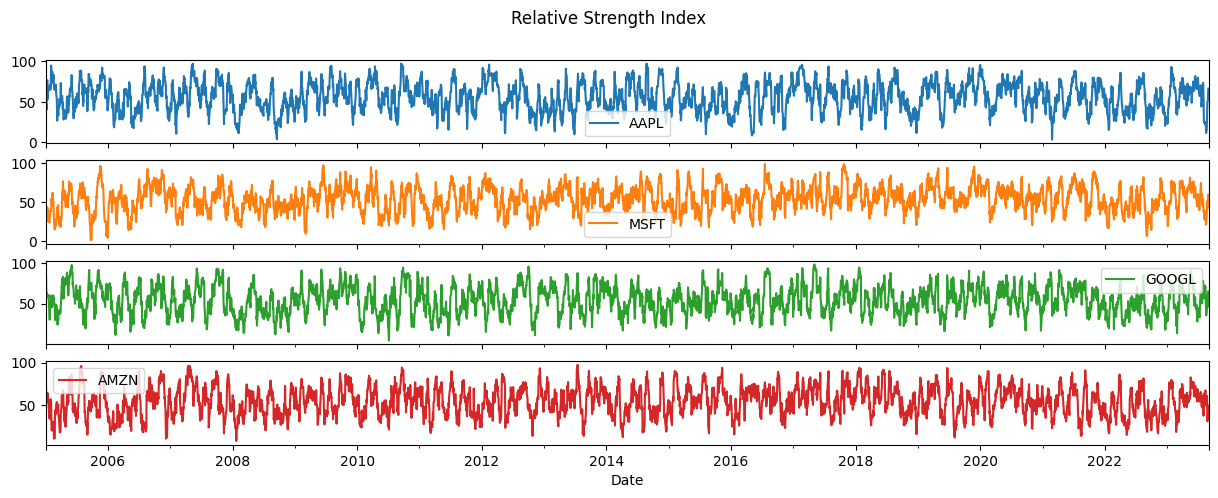

In [30]:
# Obtain the Relative Strength Index (RSI) for each company
rsi = technicals.get_relative_strength_index()

# Show the RSI for each company
display(rsi)

# Plot the RSI for each company
rsi.plot(subplots=True, figsize=(15, 5), title="Relative Strength Index")

Each functionality also has the ability to change parameters. As an example, the window for the Average Directional Index can be changed and the growth and lag can also be defined.

In [31]:
technicals.get_average_directional_index(window=20, growth=True, lag=[5, 10])

AAPL          MSFT          GOOGL            AMZN        
            Lag 5 Lag 10  Lag 5 Lag 10   Lag 5  Lag 10   Lag 5  Lag 10
Date                                                                  
2005-01-03    NaN    NaN    NaN    NaN     NaN     NaN     NaN     NaN
2005-01-04    NaN    NaN    NaN    NaN     NaN     NaN     NaN     NaN
2005-01-05    NaN    NaN    NaN    NaN     NaN     NaN     NaN     NaN
2005-01-06    NaN    NaN    NaN    NaN     NaN     NaN     NaN     NaN
2005-01-07    NaN    NaN    NaN    NaN     NaN     NaN     NaN     NaN
...           ...    ...    ...    ...     ...     ...     ...     ...
2023-08-28  0.124 0.3337 0.0554 0.4677 -0.1931  0.0182 -0.0203 -0.1463
2023-08-29 0.1099 0.3236 0.0317 0.3465 -0.2447 -0.0635 -0.0238 -0.1327
2023-08-30 0.1119 0.2847 0.0427 0.3025 -0.1939 -0.0787 -0.0226   0.009
2023-08-31 0.0861 0.2488 0.0631 0.2554   -0.12 -0.1168  0.0901  0.1621
2023-09-01  0.051 0.1849 0.0718 0.1683 -0.0624 -0.1537  0.0698  0.0986

[4699 rows x 8 columns]